In [20]:
import netCDF4
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import numpy as np


In [21]:
data1=xr.open_dataset('/mnt/e/wrf_tibet/test/2000.01/control/wrfinput_d01')
data2=data1

In [22]:
data1

<xarray.Dataset>
Dimensions:               (DIM0010: 5, Time: 1, bottom_top: 32, bottom_top_stag: 33, dust_erosion_dimension: 3, land_cat_stag: 21, num_ext_model_couple_dom_stag: 1, soil_cat_stag: 16, soil_layers_stag: 4, south_north: 171, south_north_stag: 172, west_east: 231, west_east_stag: 232)
Coordinates:
    XLAT                  (Time, south_north, west_east) float32 ...
    XLONG                 (Time, south_north, west_east) float32 ...
    XLAT_U                (Time, south_north, west_east_stag) float32 ...
    XLONG_U               (Time, south_north, west_east_stag) float32 ...
    XLAT_V                (Time, south_north_stag, west_east) float32 ...
    XLONG_V               (Time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: DIM0010, Time, bottom_top, bottom_top_stag, dust_erosion_dimension, land_cat_stag, num_ext_model_couple_dom_stag, soil_cat_stag, soil_layers_stag, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times                 (Time) |S19 ...
    LU_INDEX              (Time, south_north, west_east) float32 ...
    ZNU                   (Time, bottom_top) float32 ...
    ZNW                   (Time, bottom_top_stag) float32 ...
    ZS                    (Time, soil_layers_stag) float32 ...
    DZS                   (Time, soil_layers_stag) float32 ...
    VAR_SSO               (Time, south_north, west_east) float32 ...
    EROD                  (Time, dust_erosion_dimension, south_north, west_east) float32 ...
    U                     (Time, bottom_top, south_north, west_east_stag) float32 ...
    V                     (Time, bottom_top, south_north_stag, west_east) float32 ...
    W                     (Time, bottom_top_stag, south_north, west_east) float32 ...
    PH                    (Time, bottom_top_stag, south_north, west_east) float32 ...
    PHB                   (Time, bottom_top_stag, south_north, west_east) float32 ...
    T                     (Time, bottom_top, south_north, west_east) float32 ...
    THM                   (Time, bottom_top, south_north, west_east) float32 ...
    T_INIT                (Time, bottom_top, south_north, west_east) float32 ...
    MU                    (Time, south_north, west_east) float32 ...
    MUB                   (Time, south_north, west_east) float32 ...
    P                     (Time, bottom_top, south_north, west_east) float32 ...
    AL                    (Time, bottom_top, south_north, west_east) float32 ...
    ALB                   (Time, bottom_top, south_north, west_east) float32 ...
    PB                    (Time, bottom_top, south_north, west_east) float32 ...
    FNM                   (Time, bottom_top) float32 ...
    FNP                   (Time, bottom_top) float32 ...
    RDNW                  (Time, bottom_top) float32 ...
    RDN                   (Time, bottom_top) float32 ...
    DNW                   (Time, bottom_top) float32 ...
    DN                    (Time, bottom_top) float32 ...
    T_BASE                (Time, bottom_top) float32 ...
    CFN                   (Time) float32 ...
    CFN1                  (Time) float32 ...
    STEP_NUMBER           (Time) int32 ...
    THIS_IS_AN_IDEAL_RUN  (Time) int32 ...
    P_HYD                 (Time, bottom_top, south_north, west_east) float32 ...
    Q2                    (Time, south_north, west_east) float32 ...
    T2                    (Time, south_north, west_east) float32 ...
    TH2                   (Time, south_north, west_east) float32 ...
    PSFC                  (Time, south_north, west_east) float32 ...
    U10                   (Time, south_north, west_east) float32 ...
    V10                   (Time, south_north, west_east) float32 ...
    RDX                   (Time) float32 ...
    RDY                   (Time) float32 ...
    DTS                   (Time) float32 ...
    DTSEPS                (Time) float32 ...
    RESM                  (Time) float32 ...
    ZETATOP               (Time) float32 ...
    CF1 

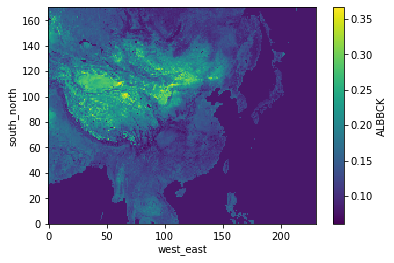

In [23]:
data1['ALBBCK'].plot()
#plt.savefig('/mnt/e/wrf_tibet/figure/test/alb.jpg',bbox_inches='tight',dpi=300)

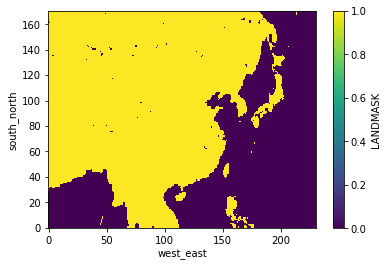

In [24]:
ds=data1['LANDMASK']
ds.plot()

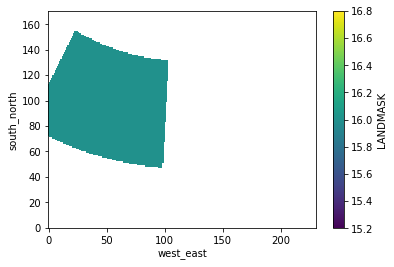

In [25]:
cropped_ds.plot()

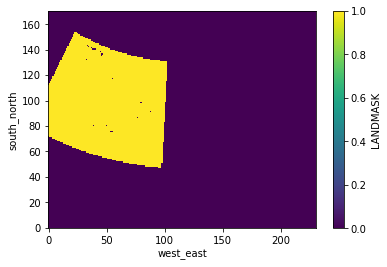

In [26]:
da1.plot()

In [27]:
min_lon = 70
min_lat = 25
max_lon = 105
max_lat = 48

mask_lon = (ds.XLONG >= min_lon) & (ds.XLONG <= max_lon)
mask_lat = (ds.XLAT >= min_lat) & (ds.XLAT <= max_lat)
cropped_ds = ds.where(mask_lon & mask_lat, drop=False)

In [28]:
cropped_ds

<xarray.DataArray 'LANDMASK' (Time: 1, south_north: 171, west_east: 231)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
    XLAT     (Time, south_north, west_east) float32 8.361839 ... 48.142765
    XLONG    (Time, south_north, west_east) float32 82.610504 ... 161.61536
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LAND MASK (1 FOR LAND, 0 FOR WATER)
    units:        
    stagger:      
    coordinates:  XLONG XLAT XTIME

In [29]:
#grass
rm_grass=np.array(cropped_ds)
rm_grass[rm_grass==10]=16
cropped_ds[:]=rm_grass
da1=cropped_ds.fillna(0)

In [30]:
#forest
rm_forest=np.array(cropped_ds)
rm_forest[rm_forest<6]=16
cropped_ds[:]=rm_forest
da3=cropped_ds.fillna(0)

In [31]:
mask_lon2 = (ds.XLONG < min_lon) | (ds.XLONG > max_lon)
mask_lat2 = (ds.XLAT< min_lat) | (ds.XLAT > max_lat)
cropped_ds2 = ds.where(mask_lon2 | mask_lat2, drop=False)
da2=cropped_ds2.fillna(0)

In [32]:
grass

<xarray.DataArray 'LANDMASK' (Time: 1, south_north: 171, west_east: 231)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
    XLAT     (Time, south_north, west_east) float32 8.361839 ... 48.142765
    XLONG    (Time, south_north, west_east) float32 82.610504 ... 161.61536
Dimensions without coordinates: Time, south_north, west_east

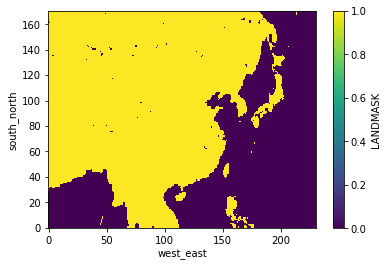

In [33]:
ds.plot()
#plt.savefig('/mnt/e/wrf_tibet/figure/test/control.jpg',bbox_inches='tight',dpi=300)

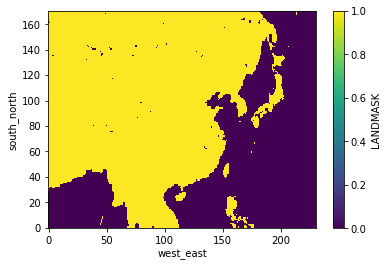

In [34]:
grass=da1+da2
grass.plot()
#plt.savefig('/mnt/e/wrf_tibet/figure/test/grass.jpg',bbox_inches='tight',dpi=300)

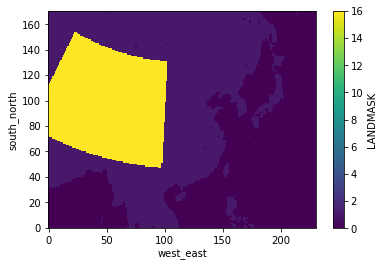

In [35]:
forest=da3+da2
forest.plot()
#plt.savefig('/mnt/e/wrf_tibet/figure/test/forest.jpg',bbox_inches='tight',dpi=300)

In [39]:
grass


<xarray.DataArray 'LANDMASK' (Time: 1, south_north: 171, west_east: 231)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
    XLAT     (Time, south_north, west_east) float32 8.361839 ... 48.142765
    XLONG    (Time, south_north, west_east) float32 82.610504 ... 161.61536
Dimensions without coordinates: Time, south_north, west_east

In [36]:
data2['LU_INDEX']=grass

In [37]:
#data2.to_netcdf('/mnt/e/wrf_tibet/test/2000.01/rm_grass/wrfinput_d01')